# Ultra Marathon EDA

## Imports

In [1]:
import pandas as pd
import seaborn as sns

## 1. Data Sourcing

In [2]:
df = pd.read_csv('./data/TWO_CENTURIES_OF_UM_RACES.csv', low_memory=False)

In [3]:
df.shape

(7461195, 13)

In [4]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [5]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

## 2. Data Preparation & Cleaning

### 2.1. Limiting the dataframe to only show events of the top 2 most frequent event distances, held in South Africa, from the year 2000 onwards

In [6]:
df2 = df[(df['Event name'].str.endswith('(RSA)'))]


In [7]:
top_two_events = df2['Event distance/length'].value_counts().nlargest(2).index.tolist()

In [8]:
df2 = df2[(df2['Event distance/length'].isin(top_two_events)) & (df2['Year of event'] >= 2000)]

In [9]:
df2.shape

(277136, 13)

In [10]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
171454,2018,31.03.2018,Two Oceans Marathon (RSA),56km,9200,3:09:22 h,Nedbank RC International,KEN,1993.0,M,M23,17.743,133335
171455,2018,31.03.2018,Two Oceans Marathon (RSA),56km,9200,3:10:32 h,Nedbank RC International,LES,1982.0,M,M35,17.635,133336
171456,2018,31.03.2018,Two Oceans Marathon (RSA),56km,9200,3:11:13 h,Entsika Athletic Club,RSA,1981.0,M,M35,17.572,133337
171457,2018,31.03.2018,Two Oceans Marathon (RSA),56km,9200,3:11:58 h,Nedbank RC International,KEN,1980.0,M,M35,17.503,133338
171458,2018,31.03.2018,Two Oceans Marathon (RSA),56km,9200,3:12:09 h,Arthur Ford Athletic Club,RSA,1983.0,M,M23,17.486,133339


### 2.2. Remove redundant '(RSA)' substring value from values in the 'Event name' column

In [11]:
df2.loc[:, 'Event name'] = df2['Event name'].str.split('(').str.get(0)

In [12]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
171454,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:09:22 h,Nedbank RC International,KEN,1993.0,M,M23,17.743,133335
171455,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:10:32 h,Nedbank RC International,LES,1982.0,M,M35,17.635,133336
171456,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:11:13 h,Entsika Athletic Club,RSA,1981.0,M,M35,17.572,133337
171457,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:11:58 h,Nedbank RC International,KEN,1980.0,M,M35,17.503,133338
171458,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:12:09 h,Arthur Ford Athletic Club,RSA,1983.0,M,M23,17.486,133339


### 2.3. Create athlete age column from 'Athlete year of birth' and 'Year of event'

In [13]:
df2.loc[:, 'Athlete age'] = df2['Year of event'] - df2['Athlete year of birth']

### 2.4. Remove 'h' from 'Athlete performance' column

In [14]:
df2.loc[:, 'Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

In [15]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
171454,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:09:22,Nedbank RC International,KEN,1993.0,M,M23,17.743,133335,25.0
171455,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:10:32,Nedbank RC International,LES,1982.0,M,M35,17.635,133336,36.0
171456,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:11:13,Entsika Athletic Club,RSA,1981.0,M,M35,17.572,133337,37.0
171457,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:11:58,Nedbank RC International,KEN,1980.0,M,M35,17.503,133338,38.0
171458,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:12:09,Arthur Ford Athletic Club,RSA,1983.0,M,M23,17.486,133339,35.0


### 2.5. Drop unneeded columns

In [16]:
df2 = df2.drop(['Athlete year of birth', 'Athlete age category', 'Athlete club'], axis=1)

In [17]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Athlete age
171454,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:09:22,KEN,M,17.743,133335,25.0
171455,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:10:32,LES,M,17.635,133336,36.0
171456,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:11:13,RSA,M,17.572,133337,37.0
171457,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:11:58,KEN,M,17.503,133338,38.0
171458,2018,31.03.2018,Two Oceans Marathon,56km,9200,3:12:09,RSA,M,17.486,133339,35.0


### 2.6. Remove null values

In [18]:
df2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete country                0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Athlete age                  139
dtype: int64

In [19]:
df2[df2['Athlete age'].isna()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Athlete age
1892253,2019,20.04.2019,Two Oceans Marathon,56km,12096,4:17:50,RSA,M,13.032,665848,NaN
1892597,2019,20.04.2019,Two Oceans Marathon,56km,12096,4:40:27,GER,M,11.981,665896,NaN
1892682,2019,20.04.2019,Two Oceans Marathon,56km,12096,4:43:30,RSA,M,11.852,665912,NaN
1892906,2019,20.04.2019,Two Oceans Marathon,56km,12096,4:51:37,BRA,M,11.522,665948,NaN
1893272,2019,20.04.2019,Two Oceans Marathon,56km,12096,4:58:24,RSA,M,11.26,54937,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5158069,2011,29.05.2011,Comrades Marathon - Up Run,87km,11080,10:00:01,XXX,M,8.7,4033,NaN
5163978,2011,29.05.2011,Comrades Marathon - Up Run,87km,11080,11:47:10,RSA,M,7.382,1101151,NaN
5372199,2012,31.03.2012,Xstrata Longtom Ultra Marathon 56km,56km,24,4:22:56,RSA,M,12.779,1353558,NaN
5587122,2013,30.03.2013,Two Oceans Marathon,56km,8246,5:29:16,GER,F,10.204,1362292,NaN


In [20]:
df2 = df2.dropna()

In [21]:
df2.shape

(276997, 11)

### 2.7. Check for duplicates

In [22]:
df2[df2.duplicated()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,Athlete age
3848692,2000,16.06.2000,Comrades Marathon - Up Run,87km,20027,10:32:11,RSA,F,8.257,1057950,43.0
4184416,2004,10.04.2004,Two Oceans Marathon,56km,8689,5:27:36,RSA,M,10.256,16051,43.0
4362780,2006,16.06.2006,Comrades Marathon - Up Run,87km,9847,7:52:18,RSA,M,11.052,1205006,25.0
5355896,2012,07.04.2012,Two Oceans Marathon,56km,7700,5:44:25,RSA,F,9.756,1116238,33.0


In [23]:
df2 = df2.drop_duplicates()

In [24]:
df2.shape

(276993, 11)

### 2.8. Reset index

In [25]:
df2.reset_index(drop=True, inplace=True)

### 2.9. Fix types

In [26]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete country               object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete age                  float64
dtype: object

In [27]:
df2['Athlete gender'] = df2['Athlete gender'].astype('category')
df2['Athlete performance'] = pd.to_timedelta(df2['Athlete performance'])
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)
df2['Athlete age'] = df2['Athlete age'].astype(int)

In [28]:
df2.dtypes

Year of event                          int64
Event dates                           object
Event name                            object
Event distance/length                 object
Event number of finishers              int64
Athlete performance          timedelta64[ns]
Athlete country                       object
Athlete gender                      category
Athlete average speed                float64
Athlete ID                             int64
Athlete age                            int64
dtype: object

### 2.10. Rename & reorder columns

In [29]:
df2 = df2.rename(columns = {
    'Year of event': 'year',
    'Event dates': 'race_day',
    'Event name': 'race_name',
    'Event distance/length': 'race_length',
    'Event number of finishers': 'finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete country': 'athlete_country',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_avg_speed',
    'Athlete ID': 'athlete_id',
    'Athlete age': 'athlete_age',
})

In [30]:
df2.head()

,year,race_day,race_name,race_length,finishers,athlete_performance,athlete_country,athlete_gender,athlete_avg_speed,athlete_id,athlete_age
0,2018,31.03.2018,Two Oceans Marathon,56km,9200,0 days 03:09:22,KEN,M,17.743,133335,25
1,2018,31.03.2018,Two Oceans Marathon,56km,9200,0 days 03:10:32,LES,M,17.635,133336,36
2,2018,31.03.2018,Two Oceans Marathon,56km,9200,0 days 03:11:13,RSA,M,17.572,133337,37
3,2018,31.03.2018,Two Oceans Marathon,56km,9200,0 days 03:11:58,KEN,M,17.503,133338,38
4,2018,31.03.2018,Two Oceans Marathon,56km,9200,0 days 03:12:09,RSA,M,17.486,133339,35


In [31]:
df3 = df2[['year', 'race_day', 'race_name', 'race_length', 'finishers', 'athlete_id', 'athlete_country', 'athlete_gender', 'athlete_age', 'athlete_performance', 'athlete_avg_speed']]

## 3. Data Analysis

### 3.1. Histogram of race lengths & athlete gender

<Axes: xlabel='race_length', ylabel='Count'>

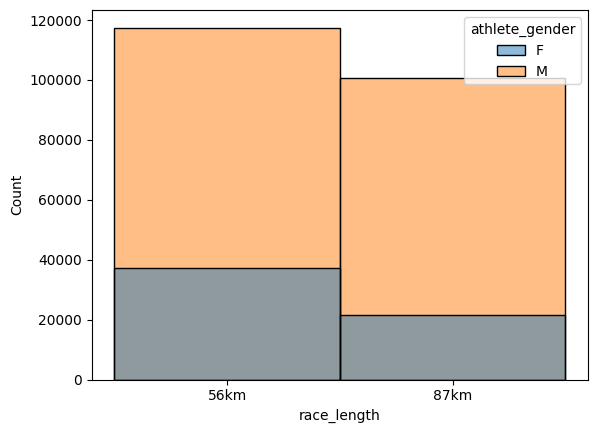

In [32]:
sns.histplot(df3, x='race_length', hue='athlete_gender')

### 3.2. Average speed of athletes

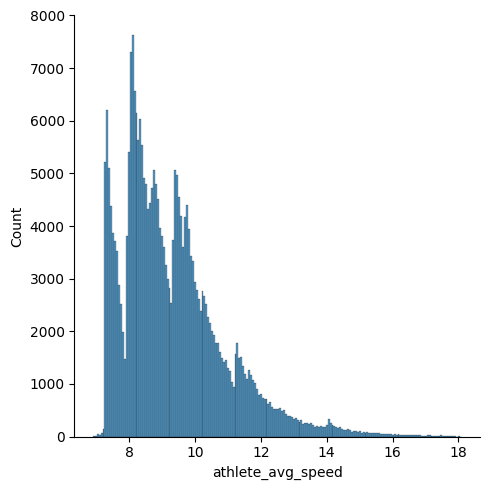

In [33]:
sns.displot(df3['athlete_avg_speed'])

### 3.3. Average speed of athletes by race length & gender

<Axes: xlabel='race_length', ylabel='athlete_avg_speed'>

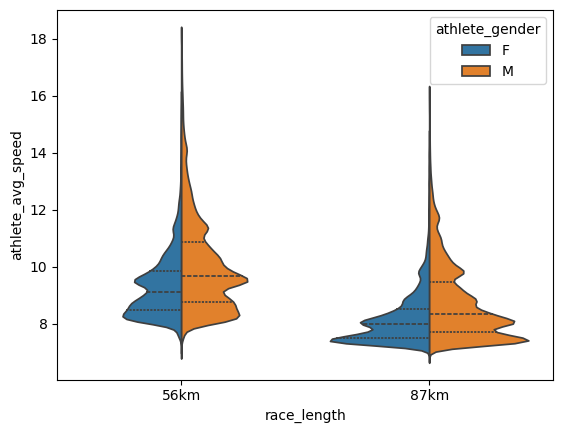

In [34]:
sns.violinplot(data = df3, x='race_length', y='athlete_avg_speed', hue='athlete_gender', split=True, inner='quart')

### 3.4. Average speed of athletes by age & gender

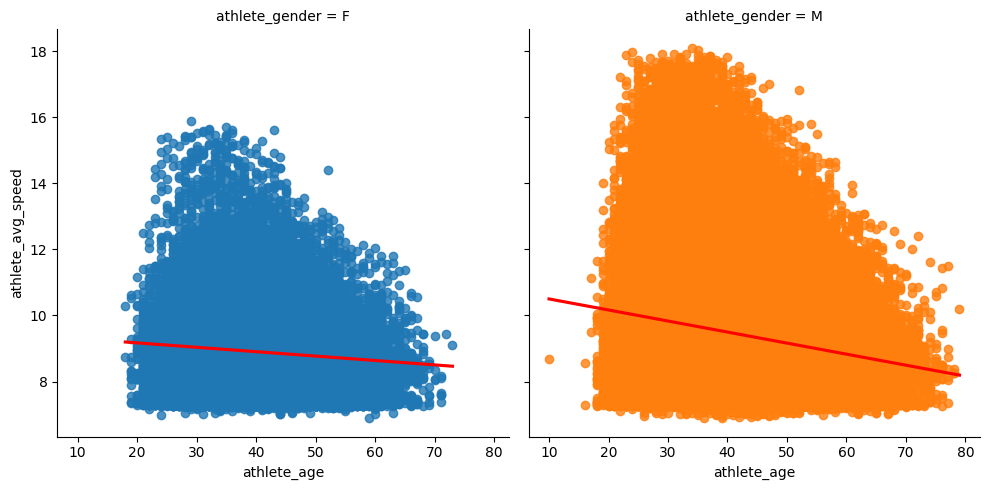

In [35]:
sns.lmplot(data=df3, x='athlete_age', y='athlete_avg_speed', hue='athlete_gender', col='athlete_gender', line_kws={'color': 'red'})

## 4. Questions

### Q1: What is the difference in average speed between men and women?

In [36]:
df3.groupby(['race_length', 'athlete_gender'])['athlete_avg_speed'].mean()

/tmp/ipykernel_42901/701098795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(['race_length', 'athlete_gender'])['athlete_avg_speed'].mean()


race_length  athlete_gender
56km         F                  9.319022
             M                 10.046297
87km         F                  8.166720
             M                  8.748934
Name: athlete_avg_speed, dtype: float64

### Q2.1: What age groups are the best across both races? (For participants with 20 or more races)

In [37]:
df3.groupby('athlete_age')['athlete_avg_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).query('count > 19').head(10)

,mean,count
athlete_age,,
29,9.741072,5637
30,9.702570,6765
28,9.702126,4687
27,9.684773,3816
31,9.682342,7693
25,9.680214,2277
26,9.652948,3021
32,9.638703,8384
34,9.591372,9954


### Q2.2: What age groups are the worst across both races? (For participants with 10 or more races)

In [38]:
df3.groupby('athlete_age')['athlete_avg_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=True).query('count > 9').head(10)

,mean,count
athlete_age,,
70,8.344179,145
73,8.386556,45
74,8.448923,26
69,8.450657,178
71,8.467624,109
67,8.522104,355
75,8.527217,23
72,8.531159,69
68,8.557080,238


### Q3: Which are the best seasons to race in?

In [39]:
df3 = df3.copy()
df3.loc[:, 'race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

In [40]:
df3.loc[:, 'race_season'] = df3['race_month'].apply(lambda x: 'Summer' if x > 11 else 'Spring' if x > 8 else 'Winter' if x > 5 else 'Autumn' if x > 2 else 'Summer')

In [41]:
df3.head()

,year,race_day,race_name,race_length,finishers,athlete_id,athlete_country,athlete_gender,athlete_age,athlete_performance,athlete_avg_speed,race_month,race_season
0,2018,31.03.2018,Two Oceans Marathon,56km,9200,133335,KEN,M,25,0 days 03:09:22,17.743,3,Autumn
1,2018,31.03.2018,Two Oceans Marathon,56km,9200,133336,LES,M,36,0 days 03:10:32,17.635,3,Autumn
2,2018,31.03.2018,Two Oceans Marathon,56km,9200,133337,RSA,M,37,0 days 03:11:13,17.572,3,Autumn
3,2018,31.03.2018,Two Oceans Marathon,56km,9200,133338,KEN,M,38,0 days 03:11:58,17.503,3,Autumn
4,2018,31.03.2018,Two Oceans Marathon,56km,9200,133339,RSA,M,35,0 days 03:12:09,17.486,3,Autumn


In [42]:
df3.groupby('race_season')['athlete_avg_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
race_season,,
Autumn,9.690173,178866
Winter,8.675466,98127


In [43]:
df3.query('race_length == "87km"').groupby('race_season')['athlete_avg_speed'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
race_season,,
Winter,8.675466,98127
Autumn,8.527878,24085
